# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 



## Homework 6: Multilayer Feedforward Network - Dealing with Missing Data


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the [instructions given in canvas](https://canvas.harvard.edu/courses/42693/pages/homework-policies-and-submission-instructions).

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below. 


**Names of person you have worked with goes here:**
<br><BR>

In [2]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display



<div class="theme"> Overview </div>

In this homework, you are free to explore different ways of solving the problems -within the restrictions of the questions. Your solutions should read like a report with figures to support your statements. Please include your code cells as usual but augment your solutions with written answers. We will also check for code readability and efficiency as we feel you have some experience now. In particular, for Q1, we expect you to write appropriate functions, such as your code can be generalized beyond the specified network architectures of his homework.

For this homework you may **not** use a machine learning library such as `keras` or `tensorflow` to build and fit the network. The objective is to build the network equations from scratch.

- Q1 explores approximating a function using a **Multilayer Feedforward Network** with one input layer, one hidden layer, and one output layer. 

- Q2 deals with missing data in a medical dataset.

<div class="exercise"> <b> Question 1: Construct a feed forward neural network [50 pts]</b> </div>
    
In this part of the homework you are to construct three feed forward neural networks consisting of an input layer, one hidden layer with 1, 2 and 4 nodes respectively, and an output layer.  The hidden layer uses the sigmoid as the activation function and use a linear  output node. 
You should code the equations from scratch. 

You are given three datasets containing ($x,y$) points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

**1.1** Create a plot of each dataset and explore the structure of the data. 

**1.2**  Give values to the weights **manually**, perform a forward pass using the data for the **single step** function and a hidden layer of **one** node, and plot the output from the network, in the same plot as the true $y$ values. Adjust the weigths (again manualy) until the plots match as closely as possible.

**1.3** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

**1.4** Do the same for the **two hump** function data but this time increase the number of hidden nodes to **four**.  

**1.5** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of the output layer's weights for all three cases (step, one hump and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What is the optimised weight value and loss you obtained? How many steps did you take to reach this value? What is the threshold value you used to stop? 

### Answers

**1.1** 

In [4]:
step_df = pd.read_csv('data/step_df.csv')
one_hump_df = pd.read_csv('data/one_hump_df.csv')
two_hump_df = pd.read_csv('data/two_hump_df.csv')

In [16]:
step_df = step_df.sort_values(["x"])
one_hump_df = one_hump_df.sort_values(["x"])
two_hump_df = two_hump_df.sort_values(["x"])

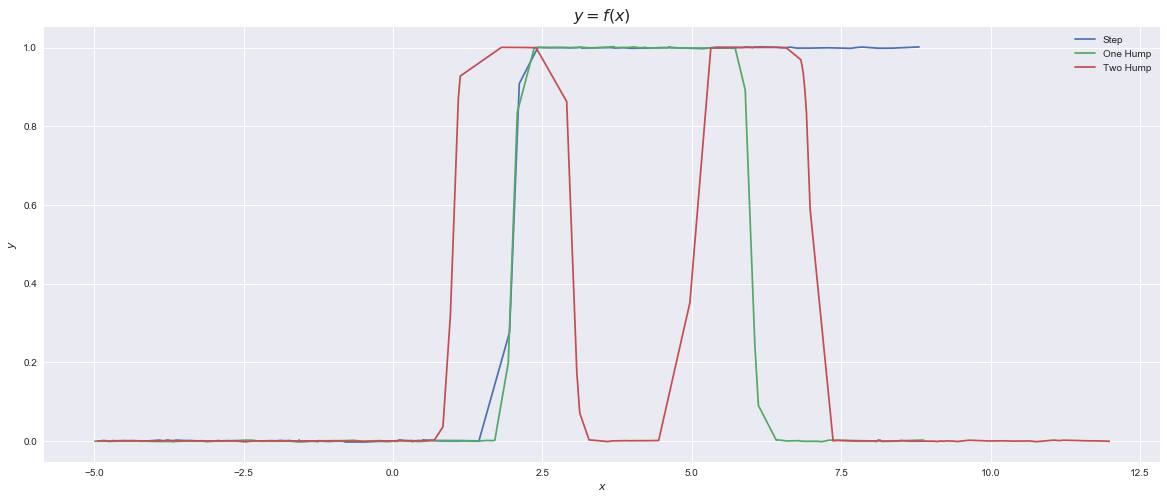

In [23]:
plt.figure(figsize=(20,8))
plt.title("$y=f(x)$", fontsize=16)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(step_df['x'], step_df['y'], label="Step")
plt.plot(one_hump_df['x'], one_hump_df['y'], label="One Hump")
plt.plot(two_hump_df['x'], two_hump_df['y'], label="Two Hump")
plt.legend()

In [52]:
def plot_dfs(df_list,labels,axes2d=None,axes_list=None):
    if axes_list is None:
        axes_list=[]
        for ax in axes2d:
            for a in ax:
                axes_list.append(a)
    for ctr, df in enumerate(df_list, 0):
        axes_list[ctr].set_title(labels[ctr], fontsize=12)
        axes_list[ctr].set_xlabel("$x$")
        axes_list[ctr].set_ylabel("$y$")
        axes_list[ctr].plot(df['x'],df['y'],"o-")

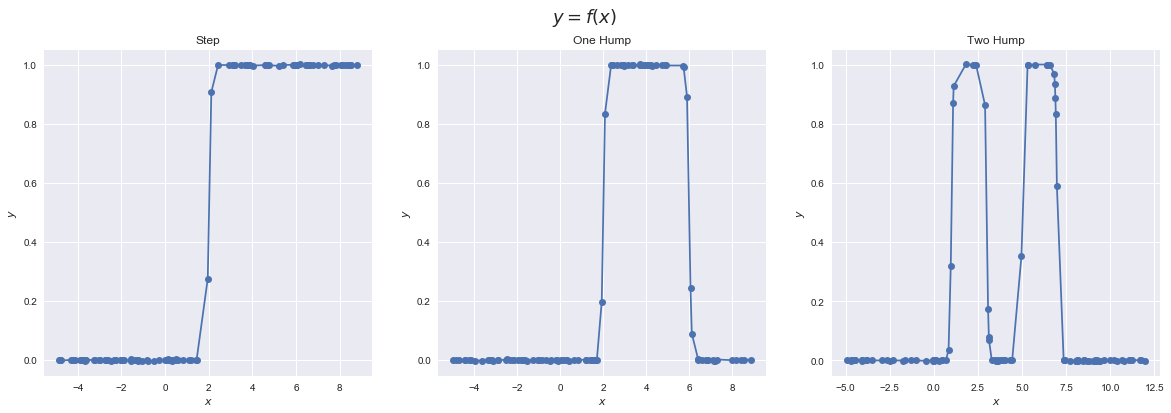

In [53]:
fig, axes = plt.subplots(1,3,figsize=(20,6))
fig.suptitle("$y=f(x)$", fontsize=18)
plot_dfs([step_df,one_hump_df,two_hump_df],["Step","One Hump","Two Hump"],axes_list=axes)

**1.2** 

In [55]:
def affine(x, w, b):
    return w*x+b

def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

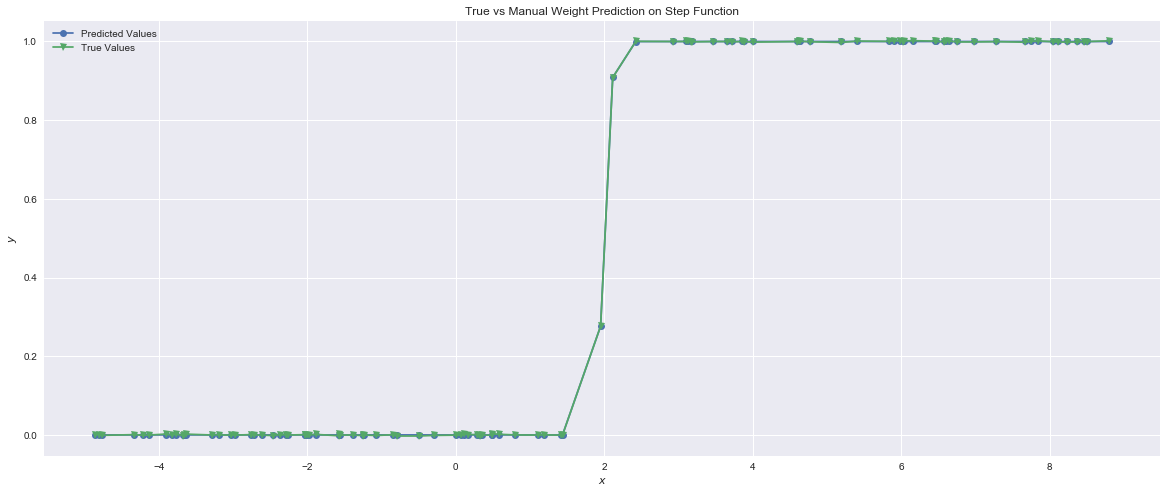

In [115]:
y_pred_step = sigmoid(affine(step_df["x"],20,-40))
plt.figure(figsize=(20,8))
plt.title("True vs Manual Weight Prediction on Step Function")
plt.plot(step_df['x'],y_pred_step, label="Predicted Values", marker="o")
plt.plot(step_df['x'],step_df['y'], label="True Values", marker="v")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

**1.3** 

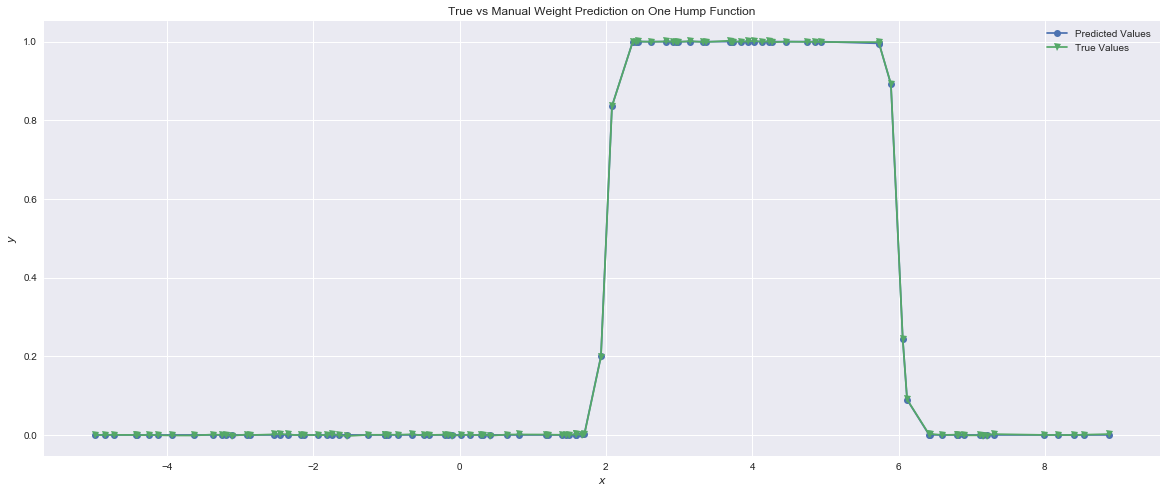

In [116]:
y_pred_one = affine(sigmoid(affine(one_hump_df["x"],20,-40))+sigmoid(affine(one_hump_df["x"],-20,120)),1,-1)
plt.figure(figsize=(20,8))
plt.title("True vs Manual Weight Prediction on One Hump Function")
plt.plot(one_hump_df['x'],y_pred_one, label="Predicted Values", marker="o")
plt.plot(one_hump_df['x'],one_hump_df['y'], label="True Values", marker="v")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

**1.4**

In [143]:
y_pred_two = sigmoid(affine(two_hump_df["x"],20,-20))+sigmoid(affine(two_hump_df["x"],-20,60))+
                    sigmoid(affine(two_hump_df["x"],20,-100))+sigmoid(affine(two_hump_df["x"],-20,140))
#sigmoid(affine(two_hump_df["x"],-20,120)),1,-1)
plt.figure(figsize=(20,8))
plt.title("True vs Manual Weight Predicted on Two Hump Function")
plt.plot(two_hump_df['x'],y_pred_two, label="Predicted Values", marker="o")
plt.plot(two_hump_df['x'],two_hump_df['y'], label="True Values", marker="v")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

SyntaxError: invalid syntax (<ipython-input-143-a79c2387b614>, line 1)

**1.5** 

In [45]:
# your code here


<div class="exercise"> <b> Question 2: Working with missing data. [50 pts]</b> </div>

In this exercise we are going to use the **Pima Indians onset of diabetes** dataset found in `pima-indians-diabetes.csv`. This dataset describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (onset of diabetes as 1 or not as 0). The input variables that describe each patient are numerical and have varying scales. The list below shows the eight attributes plus the target variable for the dataset:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skin fold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
-  Body mass index.
-  Diabetes pedigree function.
- Age (years).<br>
- **Outcome** (1 for early onset of diabetes within five years, 0 for not), target class.

**2.1**. Load the dataset into a pandas dataframe named `pima_df`. Clean the data by looking at the various features and making sure that their values make sense. Look for missing data including disguised missing data. The problem of disguised missing data arises when missing data values are not explicitly represented as such, but are coded with values that can be misinterpreted as valid data. Comment on your findings.

**2.2** Split the dataset into a 75-25 train-test split (use `random_state=9001`). Fit a logistic regression classifier to the training set and report the  accuracy of the classifier on the test set. You should use $L_2$ regularization in logistic regression, with the regularization parameter tuned using cross-validation (`LogisticRegressionCV`).  Report the overall classification rate.

**2.3** Restart with a fresh copy of the whole dataset and impute the missing data via mean imputation.  Split the data 75-25 (use `random_state=9001`) and fit a regularized logistic regression model.  Report the overall classification rate.  

**2.4** Again restart with a fresh copy of the whole dataset and impute the missing data via a model-based imputation method. Once again split the data 75-25 (same `random_state=9001`) and fit a regularized logistic regression model.  Report the overall classification rate.

**2.5** Compare the results in the 3 previous parts of this problem.  Prepare a paragraph (5-6 sentences) discussing the results, the computational complexity of the methods,  and explain why you get the results that you see.

**2.6** This question does not have one answer and requires some experimentation. Check which coefficients changed the most between the model in 2.1-2.2 and the models in 2.3 and 2.4. Are they the coefficients you expected to change given the imputation you performed? If not explain why (supporting your explanation using the data is always a good idea).


### Answers

**2.1** 

In [46]:
# your code here


**2.2** 

In [47]:
# your code here


**2.3** 

In [49]:
# your code here


**2.4** 

In [50]:
# your code here


**2.5** 

*your answer here*


**2.6** 